<a href="https://colab.research.google.com/github/zzerross/ai/blob/main/rnn/sin/LSTMSinReference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Refer https://m.blog.naver.com/chunjein/222131850058
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['lines.markersize'] = 0.5
mpl.rcParams['lines.linewidth'] = 0.2

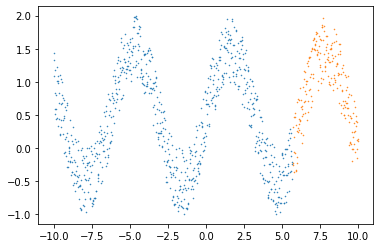

In [2]:
def get_input(start, end, num, timesteps):
  radians = np.linspace(start, end, num + timesteps)
  sin = np.sin(radians) + np.random.random(num + timesteps)
  return radians, sin

input_dim = 1
output_dim = 1
timesteps = 20
hidden_units = 50

data_n = 1000
data_x, data_y = get_input(-10, 10, data_n, timesteps)

train_n = int(data_n * 0.8)
test_n = int(data_n * 0.2)

train_x, train_y = data_x[:train_n], data_y[:train_n]
test_x, test_y = data_x[train_n:], data_y[train_n:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)

In [3]:
# 1차원 배열의 시계열 데이터로 학습용 배치 파일을 만든다. 입력값 = 1개, 출력값 = 1개
# return : xBatch - RNN 입력
#          yBatch - RNN 출력
#
# step = 3 인 경우의 예시
# xData = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
# 
# xBatch, yBatch는 3차원 텐서로 만든다. (-1, step=3, 1)
# xBatch = [[1]] [[2]] [[3]] [[4]] [[5]] [[6]] [[7]] --> 7 x 3 x 1
#          [[2]] [[3]] [[4]] [[5]] [[6]] [[7]] [[8]]
#          [[3]] [[4]] [[5]] [[6]] [[7]] [[8]] [[9]]
#
# yBatch =  [4]   [5]   [6]   [7]   [8]   [9]   [10] --> 7 x 1
#
# ex : xBatch[0] = [[3],[4],[5]],   yBatch[0] = [6]
#      3-step 짜리 LSTM에 3,4,5가 입력되면 6이 출력되도록 학습한다.
def make_sequence(input, timesteps):
  x = list(map(lambda x: input[x:x+timesteps], range(len(input) - timesteps)))
  y = input[timesteps:]
  return np.reshape(x, (-1, timesteps, input_dim)), np.reshape(y, (-1, input_dim))

def test_sequence(n=3):
  print(make_sequence([0, 1, 2, 3, 4, 5, 6], n))
test_sequence()

train_seq_x, train_seq_y = make_sequence(train_y, timesteps)
test_seq_x, test_seq_y = make_sequence(test_y, timesteps)

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]]]), array([[3],
       [4],
       [5],
       [6]]))


In [4]:
def make_reference_model():
  xInput = layers.Input(batch_shape=(None, timesteps, 1))
  xLstm = layers.LSTM(hidden_units)(xInput)
  xOutput = layers.Dense(output_dim)(xLstm)
  model = models.Model(xInput, xOutput)
  model.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=0.01))
  model.summary()
  return model

def make_model():
  model = models.Sequential()
  model.add(layers.LSTM(hidden_units, input_shape=(timesteps, input_dim)))
  model.add(layers.Dense(output_dim))
  model.compile(loss='mse')
  model.summary()
  return model
# model = make_reference_model()
model = make_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


25/25 [==============================] - 0s 11ms/step - loss: 0.1097


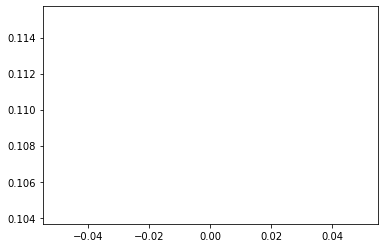

In [8]:
history = model.fit(train_seq_x, train_seq_y, epochs=100, verbose=0)
plt.plot(history.history['loss'])

In [9]:
predicted_y = model.predict(test_seq_x)

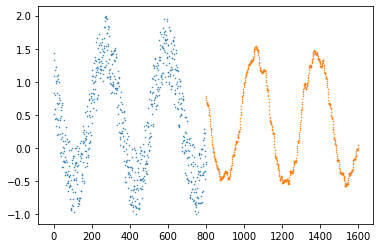

In [10]:
plt.scatter(np.arange(len(train_y)), train_y)
plt.scatter(np.arange(len(train_y), len(train_y) + len(predicted_y)), predicted_y)